## Cluster analysis(군집화 분석)

* Cluster analysis(군집화 분석)이란 주어진 데이터들의 특성을 고려해 데이터 집단(Cluster)을 정의하고 데이터 집단의 대표할 수 있는 대표점을 찾는 것으로 데이터 마이닝의 한 방법이다. 

* Cluster란 비슷한 특성을 가진 데이터들의 집단. 반대로 데이터의 특성이 다르면 다른 클러스터에 속해야 한다.

* 효율성 : Cluster 분석을 통해 수백만의 데이터를 직접 확인하지 않고 각각 Cluster의 대표값만 확인해 전체 데이터의 특성을 파악할 수 있다.

출처 : [클러스터 분석 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0_%EB%B6%84%EC%84%9D)


## scikit-learn의 Clustering 알고리즘 비교
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

출처 : [scikit-learn 2.3.1. Overview of clustering method](https://scikit-learn.org/stable/modules/clustering.html#clustering)


## K-Means

* 주어진 데이터를 k개의 클러스터로 묶는 알고리즘으로, 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작한다. 

* 이 알고리즘은 자율 학습의 일종으로, 레이블이 달려 있지 않은 입력 데이터에 레이블을 달아주는 역할을 수행한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Kmeans_animation_withoutWatermark.gif/220px-Kmeans_animation_withoutWatermark.gif">

출처 : [K-평균_알고리즘 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/K-%ED%8F%89%EA%B7%A0_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)

## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 파일 불러오기

In [2]:
# rfm.csv 파일을 읽어오고, index는 "CustomerID"로 설정해 줍니다.

rfm = pd.read_csv("rfm.csv")
rfm = rfm.set_index("CustomerID")
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver
12347.0,2,182,4310.00,5,5,5,555,15,platinum
12348.0,75,31,1797.24,2,3,4,234,9,gold
12349.0,19,73,1757.55,4,4,4,444,12,platinum
12350.0,310,17,334.40,1,2,2,122,5,silver
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,silver
18281.0,181,7,80.82,1,1,1,111,3,silver
18282.0,8,12,178.05,5,1,1,511,7,silver


## rfm_cluster 변수 생성

In [3]:
# iloc를 사용하여 Recency, Frequency, MonetaryValue 컬럼 데이터를 rfm_cluster 변수에 담습니다.

rfm_cluster = rfm.iloc[:,0:3]
rfm_cluster

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


## 정규화

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Binary_logarithm_plot_with_ticks.svg/1200px-Binary_logarithm_plot_with_ticks.svg.png" width="300">

In [4]:
# np.log1p 메서드를 사용하여 값들을 정규화 시켜주고, rfm_cluster_log 변수에 담습니다.
# 정규화시 np.log보다 np.log1p을 사용하는 이유는 x값이 1보다 작을 때, y값이 음의 무한대로 가는 것을 방지하기 위함입니다.
# 정규화를 함으로써 각 속성별로 다양한 수의 범위를 줄여줄 수 있습니다.

rfm_cluster_log = np.log1p(rfm_cluster)
rfm_cluster_log

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,5.789960,0.693147,11.253955
12347.0,1.098612,5.209486,8.368925
12348.0,4.330733,3.465736,7.494564
12349.0,2.995732,4.304065,7.472245
12350.0,5.739793,2.890372,5.815324
...,...,...,...
18280.0,5.631212,2.397895,5.201806
18281.0,5.204007,2.079442,4.404522
18282.0,2.197225,2.564949,5.187665


## 스케일 조정하기

In [5]:
# StandardScaler 메서드를 사용하여 속성 값의 범위가 크게 차이 나지 않도록 평균 0, 분산 1로 조정해 줍니다.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_cluster_log)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
# fit_transform 메서드를 사용하여 rfm_cluster_log를 rfm_norm 변수에 담습니다.

rfm_norm = scaler.fit_transform(rfm_cluster_log)
rfm_norm

array([[ 1.46190736, -2.43788926,  3.71030846],
       [-2.0405272 ,  1.18891259,  1.41710205],
       [ 0.37248773, -0.211389  ,  0.72210361],
       ...,
       [-1.22033272, -0.93475683, -1.11156693],
       [-1.65915848,  2.2911166 ,  0.82490915],
       [-0.03554715,  0.42858907,  0.73960806]])

### K-Means 모델 학습

In [7]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    # rfm_norm 값을 학습하고
    # 리스트에 inertia_ 값을 넣어 elbow 값을 봅니다.
    kmeans.fit(rfm_norm)
    inertia.append(kmeans.inertia_)

## 시각화

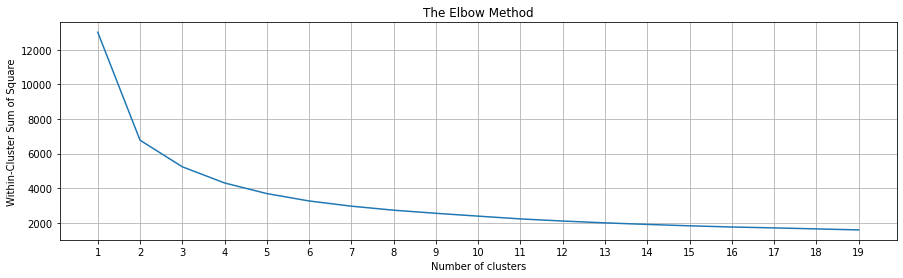

In [8]:
# The Elbow Method 그래프에서 급격히 떨어지는 구간을 확인하여, 적절한 K값을 확인해 봅니다.

plt.figure(figsize=(15,4))
plt.plot(range(1, 20), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

In [9]:
# n_clusters의 수를 늘려 봅니다.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(rfm_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# cluster_centers_를 통해서 좌표값을 출력해 봅니다.

kmeans.cluster_centers_

array([[ 0.0065652 ,  0.65785317,  0.62195687],
       [ 0.839662  , -1.37467798, -1.22088335],
       [-0.83040893, -0.27697545, -0.35868748],
       [-1.35777821,  1.3318999 ,  1.38560071],
       [ 0.82036276, -0.28727425, -0.33472999]])

In [11]:
# labels_를 통해서 어떤 클러스터에 속하는지 확인합니다.

kmeans.labels_

array([0, 3, 0, ..., 2, 3, 0], dtype=int32)

In [12]:
# rfm['Cluster']에 kmeans.labels_ 값을 담아줍니다.

rfm['Cluster'] = kmeans.labels_
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver,0
12347.0,2,182,4310.00,5,5,5,555,15,platinum,3
12348.0,75,31,1797.24,2,3,4,234,9,gold,0
12349.0,19,73,1757.55,4,4,4,444,12,platinum,0
12350.0,310,17,334.40,1,2,2,122,5,silver,4
...,...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,silver,1
18281.0,181,7,80.82,1,1,1,111,3,silver,1
18282.0,8,12,178.05,5,1,1,511,7,silver,2


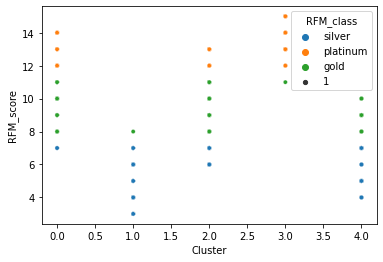

In [13]:
# Cluster와 RFM_score의 상관관계를 살펴보기 위해 scatterplot으로 산점도를 출력해 봅니다.(RFM_class를 통해 데이터를 구분할 수 있습니다.)

sns.scatterplot(data=rfm, x="Cluster", y="RFM_score", hue="RFM_class", size=1)

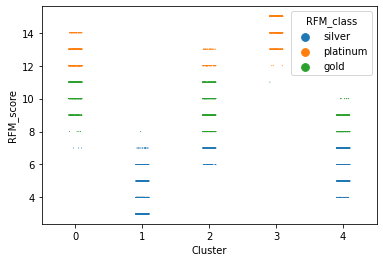

In [14]:
# stripplot은 scatterplot과 유사하나 데이터가 겹치면 양 옆으로 흩어진 형태를 보입니다.

sns.stripplot(data=rfm, x="Cluster", y="RFM_score", hue="RFM_class", size=1)

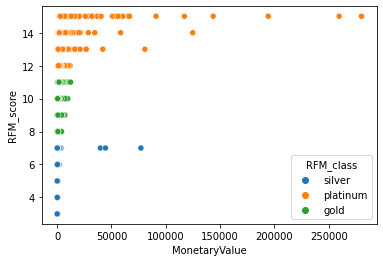

In [15]:
# MonetaryValue와 RFM_score의 상관관계를 살펴보기 위해 scatterplot으로 산점도를 출력해 봅니다.
# RFM_class를 통해 데이터를 구분할 수 있습니다.

sns.scatterplot(data=rfm, x="MonetaryValue", y="RFM_score", hue="RFM_class")

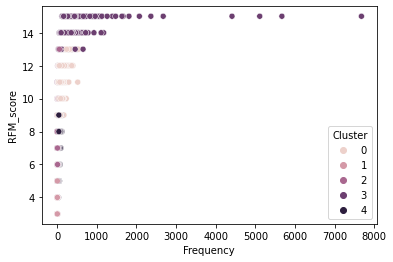

In [16]:
# Frequency와 RFM_score의 살펴보기 위해 산점도를 출력해 봅니다.
# RFM_class를 통해 데이터를 구분할 수 있습니다.

sns.scatterplot(data=rfm, x="Frequency", y="RFM_score", hue="Cluster")

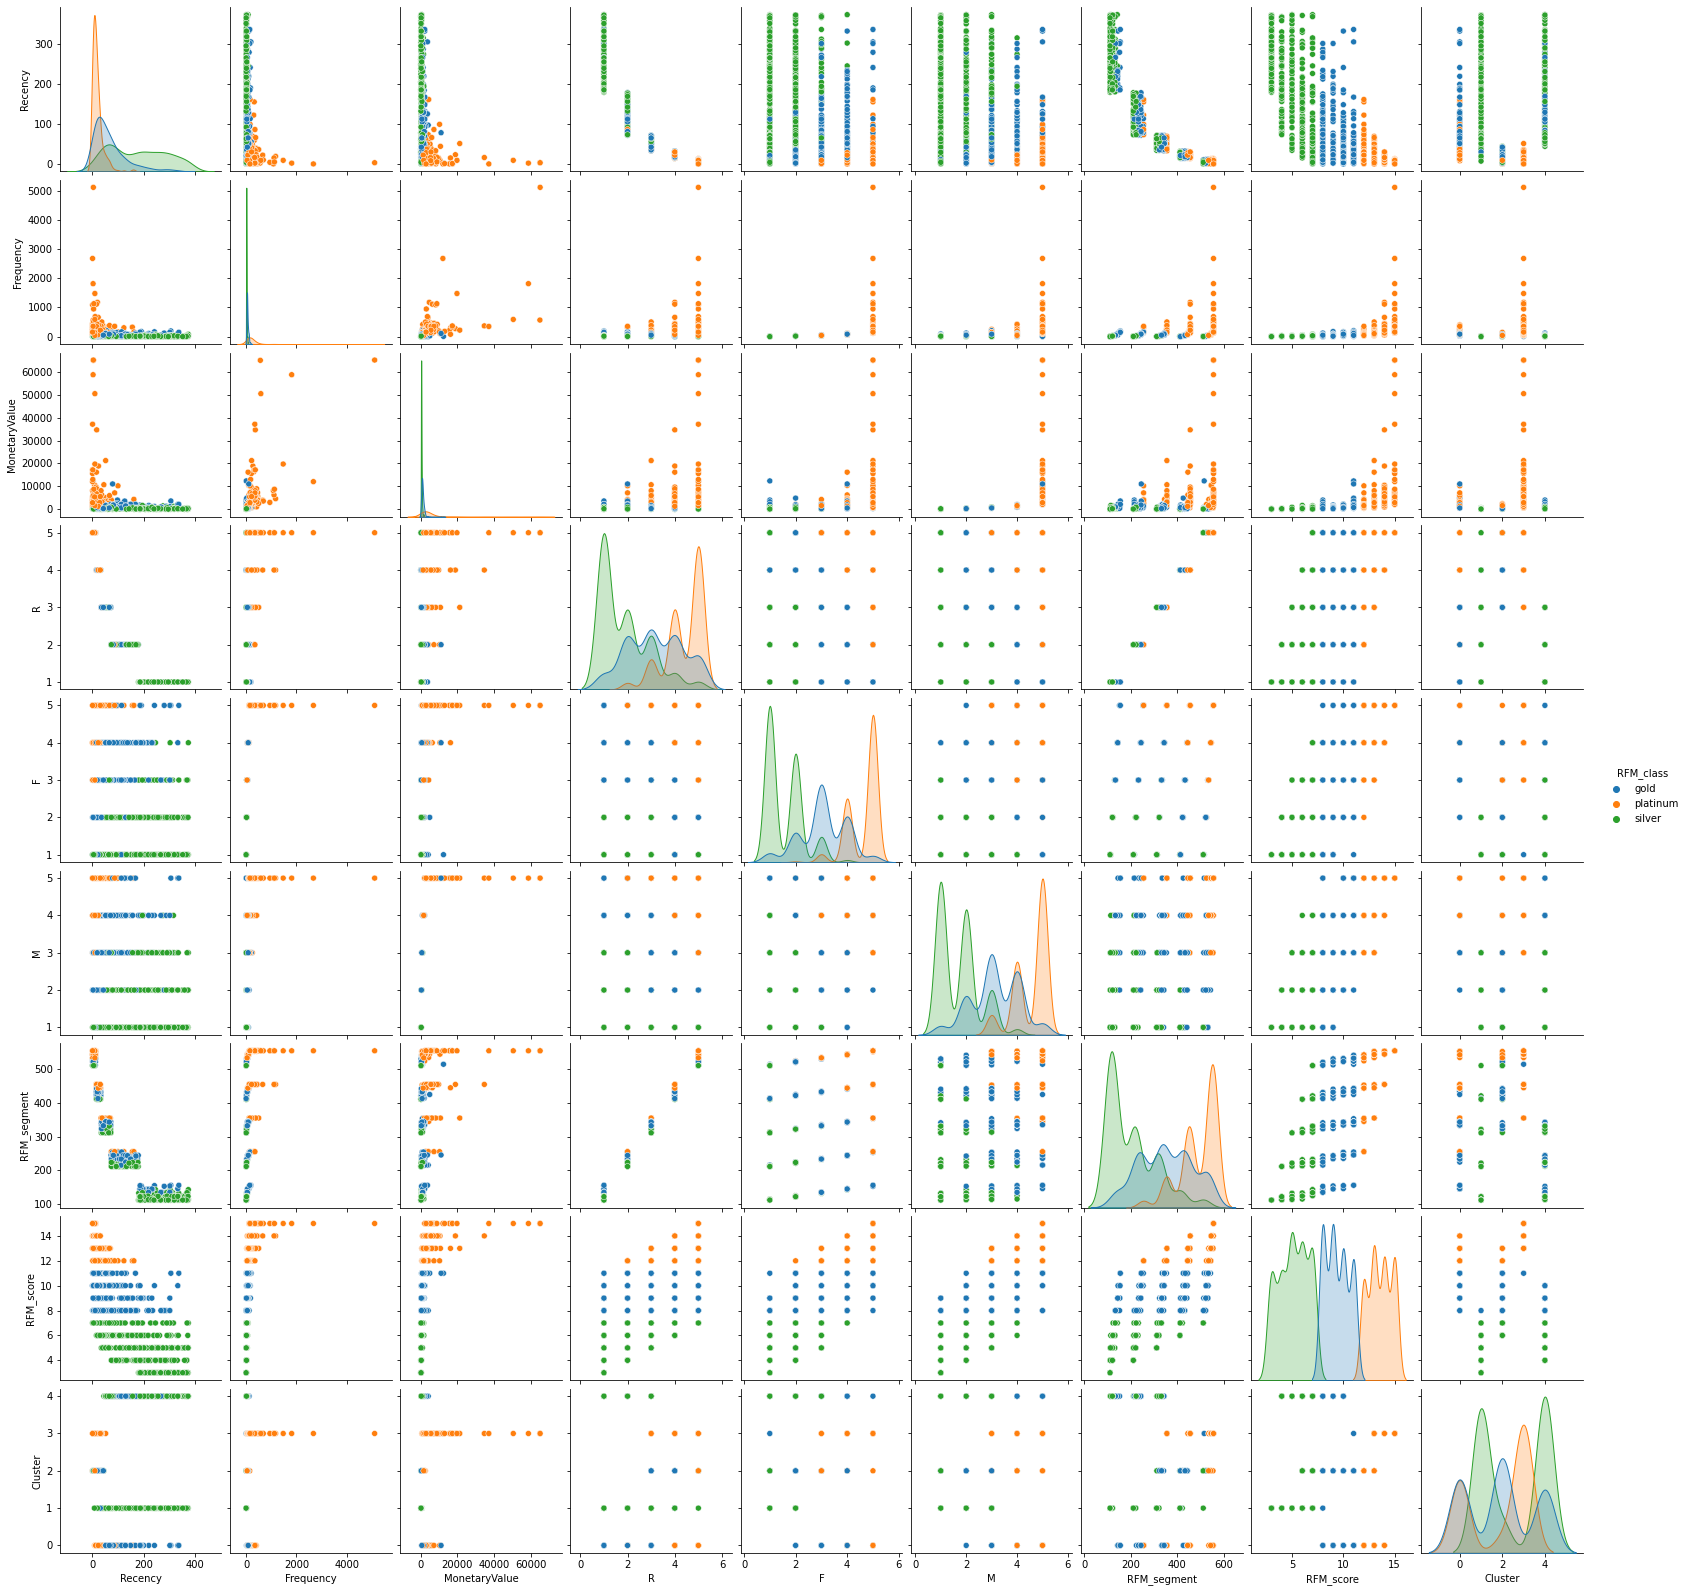

In [17]:
# pairplot을 통해 rfm의 데이터 중 무작위로 1000개의 데이터만을 추출해 pairplot을 시각화 합니다.
# RFM_class를 통해 데이터를 구분할 수 있습니다.

sns.pairplot(data=rfm.sample(1000), hue="RFM_class")